<a href="https://colab.research.google.com/github/mhaletoki/MA22C025_2023_PL/blob/main/Assignments/Assignment_3/rising_C02_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import urllib.request
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
data_url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
data_file = '../../data_external/CO2_levels'


In [73]:
import shutil
if not os.path.isdir('../../data_external/'):
  os.mkdir('../../data_external/')
A= urllib.request.urlopen(data_url)
B = open(data_file, 'wb')
shutil.copyfileobj(A, B)
B.close()


In [92]:
data = np.genfromtxt(data_file, skip_header=72,names=("year", "month", "date","average"))

# Mask invalid values using numpy's masked array

data['average'] = np.ma.masked_invalid(data['average'])


# Define column names
columns = ['year', 'month', 'date', 'average']

# Create a pandas DataFrame from the masked data
data_frame = pd.DataFrame(data)


# Display the resulting DataFrame
data_frame

,year,month,date,average
0,1959.0,5.0,1959.3699,318.29
1,1959.0,6.0,1959.4548,318.15
2,1959.0,7.0,1959.5370,316.54
3,1959.0,8.0,1959.6219,314.80
4,1959.0,9.0,1959.7068,313.84
...,...,...,...,...
766,2023.0,3.0,2023.2083,420.98
767,2023.0,4.0,2023.2917,423.36
768,2023.0,5.0,2023.3750,424.00
769,2023.0,6.0,2023.4583,423.68


In [93]:
# Group data by year and month and then calculate the average
data_frame = pd.DataFrame(data)
monthly_averages= data['average']



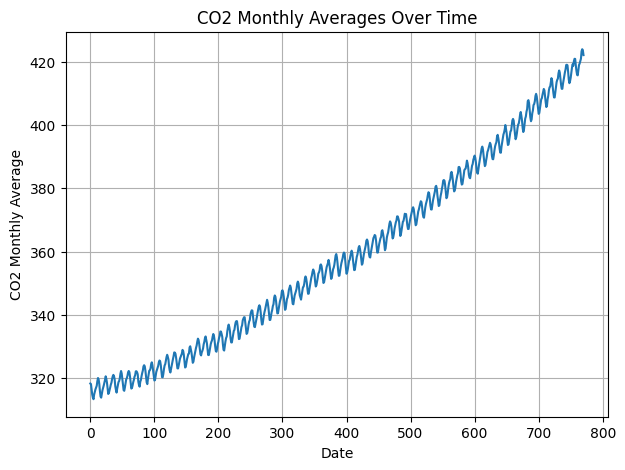

In [94]:
plt.figure(figsize=(7, 5))
plt.plot(monthly_averages)
plt.xlabel('Date')
plt.ylabel('CO2 Monthly Average')
plt.title('CO2 Monthly Averages Over Time')
plt.grid(True)  # Add grid lines
plt.show()

In [95]:
# Calculate the first differences
rate_change = np.diff(monthly_averages)




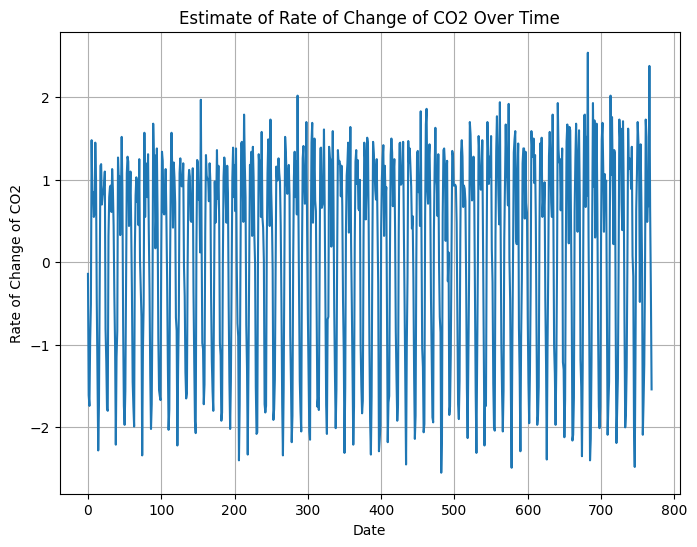

In [96]:
plt.figure(figsize=(8, 6))
plt.plot(rate_change)
plt.xlabel('Date')
plt.ylabel('Rate of Change of CO2')
plt.title('Estimate of Rate of Change of CO2 Over Time')
plt.grid(True)  # Add grid lines
plt.show()
